In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import h5py
from lr_utils import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [7]:
# Example of a picture
index = 20
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


In [43]:
print('Class labels:', np.unique(train_set_y))
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print("----------------------------")
x_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1) 
x_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print(x_train.shape)
print(x_test.shape)
print("----------------------------")
y_train=np.squeeze(train_set_y)
y_test=np.squeeze(test_set_y)
#print(np.ravel(test_set_y))
print(y_train.shape)
print(y_test.shape)


Class labels: [0 1]
(209, 64, 64, 3)
(50, 64, 64, 3)
----------------------------
(209, 12288)
(50, 12288)
----------------------------
(209,)
(50,)


In [68]:
lr = LogisticRegression(C=10.0)
lr.fit(x_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
lr.predict(x_test[0].reshape(1,-1))
predictions = lr.predict(x_test)
sc = lr.score(x_train, y_train)
print(sc)
score = lr.score(x_test, y_test)
print(score)

1.0
0.72


In [70]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[13  4]
 [10 23]]


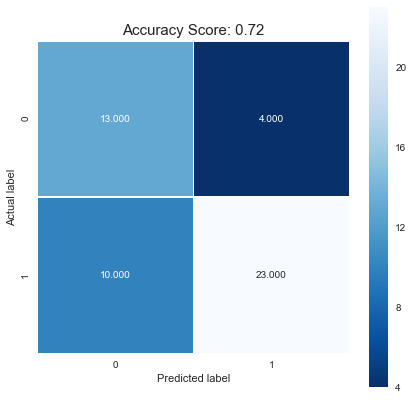

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

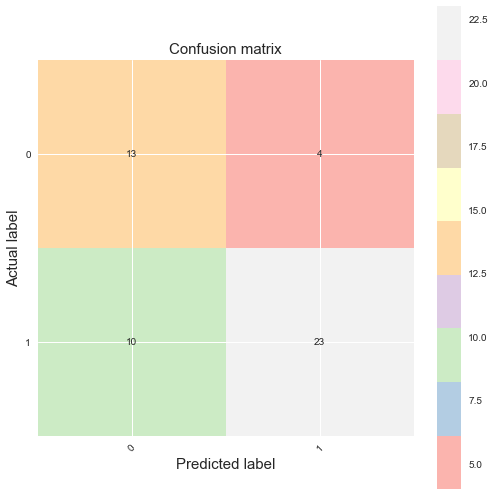

In [58]:
plt.figure(figsize=(7,7))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1" ], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')